##Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from PIL import Image

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Conv2D,InputLayer, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D

##Loading dataset 

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/My Drive/age_gender.csv')

##Data filtering

In [ ]:
df

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...


In [ ]:
df.head()
df=df.drop(['ethnicity','img_name'],axis=1)
df

,age,gender,pixels
0,1,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,0,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...
23700,99,1,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,99,1,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,99,1,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,99,1,45 108 120 156 206 197 140 180 191 199 204 207...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     23705 non-null  int64 
 1   gender  23705 non-null  int64 
 2   pixels  23705 non-null  object
dtypes: int64(2), object(1)
memory usage: 555.7+ KB


In [ ]:
df.count()

age       23705
gender    23705
pixels    23705
dtype: int64

In [ ]:
df['gender'].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [ ]:
df['age'].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
103       1
111       1
Name: age, Length: 104, dtype: int64

##Image resizing

In [ ]:
df['pixels'] = df['pixels'].map(lambda x: np.array(x.split(' '), dtype=np.float32).reshape(48, 48))
X = np.array(df['pixels'].to_list())
X_reshaped = X.reshape(X.shape[0], 48, 48, 1)

In [ ]:
def imageresizing(a):
  for i in range(len(a)):
    a=X_reshaped[i]
    X_reshaped[i]=tf.image.resize(X_reshaped[i],[48,48] )

In [ ]:
imageresizing(X_reshaped)

In [ ]:
X[0].shape

(48, 48)

##Normalizing image

In [ ]:
for i in range(23705):
  X_reshaped[i]=X_reshaped[i]/255

In [ ]:
X[0] 

array([[0.5058824 , 0.5019608 , 0.5019608 , ..., 0.4627451 , 0.3882353 ,
        0.20784314],
       [0.50980395, 0.5058824 , 0.5019608 , ..., 0.45882353, 0.38431373,
        0.20392157],
       [0.5137255 , 0.5058824 , 0.50980395, ..., 0.44705883, 0.38039216,
        0.19607843],
       ...,
       [0.4745098 , 0.5411765 , 0.5764706 , ..., 0.5921569 , 0.5882353 ,
        0.5803922 ],
       [0.45882353, 0.5372549 , 0.57254905, ..., 0.58431375, 0.5803922 ,
        0.5803922 ],
       [0.4509804 , 0.5294118 , 0.5568628 , ..., 0.57254905, 0.57254905,
        0.57254905]], dtype=float32)

(48, 48)

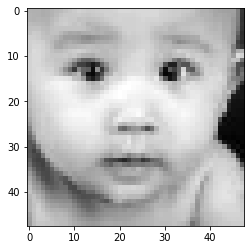

In [ ]:
im=np.reshape(df['pixels'][0],(48,48))
plt.imshow(im,cmap='gray')
im.shape

In [ ]:
y=df['gender'].values

##CNN model

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D,InputLayer, Dropout, BatchNormalization, Flatten, Dense, MaxPooling2D

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(48,48,1),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization()) 
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization()) 
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 10, 10, 64)       256       
 ormalization)                                                   
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
callbacks = [EarlyStopping(patience=4, monitor='val_loss', mode='min'), 
             ReduceLROnPlateau(patience=2, verbose=1)]             

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [ ]:
n_epochs = 40
batch_size = 64
history = model.fit(X_train, y_train, 
                           epochs=n_epochs, 
                           callbacks=callbacks,
                           validation_data=(X_test, y_test))

Epoch 1/40
593/593 [==============================] - 19s 15ms/step - loss: 0.4165 - accuracy: 0.8186 - val_loss: 0.5837 - val_accuracy: 0.7269 - lr: 0.0010
Epoch 2/40
593/593 [==============================] - 8s 13ms/step - loss: 0.2816 - accuracy: 0.8730 - val_loss: 0.2984 - val_accuracy: 0.8673 - lr: 0.0010
Epoch 3/40
593/593 [==============================] - 8s 13ms/step - loss: 0.2440 - accuracy: 0.8926 - val_loss: 0.4589 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 4/40
593/593 [==============================] - 7s 12ms/step - loss: 0.2095 - accuracy: 0.9106 - val_loss: 0.2834 - val_accuracy: 0.8823 - lr: 0.0010
Epoch 5/40
593/593 [==============================] - 8s 13ms/step - loss: 0.1845 - accuracy: 0.9235 - val_loss: 0.2938 - val_accuracy: 0.8760 - lr: 0.0010
Epoch 6/40
593/593 [==============================] - ETA: 0s - loss: 0.1525 - accuracy: 0.9373
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
593/593 [==============================] -

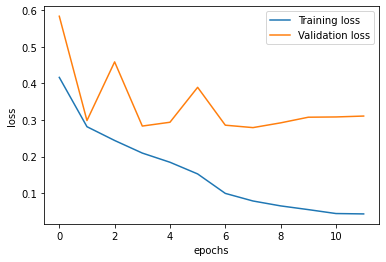

In [ ]:
# Visulizing the loss functions
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="Training loss")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

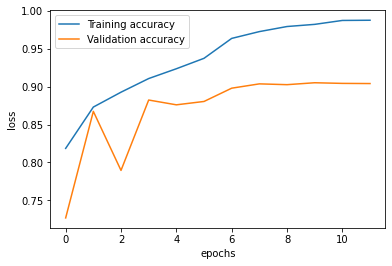

In [ ]:
# Visualizing the accuracy of model
plt.plot(history.history['accuracy'],label="Training accuracy")
plt.plot(history.history['val_accuracy'],label="Validation accuracy")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
import pickle
with open("model_pickle1","wb") as f:
  pickle.dump(model,f)

INFO:tensorflow:Assets written to: ram://8bdafebb-8317-43d3-b833-f36cd6d1a364/assets


In [ ]:
y=df['age'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [ ]:
np.unique(y)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  95,  96,  99, 100, 101, 103, 105, 110, 111, 115, 116])

In [ ]:
model1=Sequential()
model1.add(Conv2D(32,(3,3),input_shape=(48,48,1),activation="relu"))
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(64,(3,3),activation="relu"))
model1.add(MaxPooling2D((2,2)))
model1.add(BatchNormalization()) 
model1.add(Conv2D(128,(3,3),activation="relu"))
model1.add(MaxPooling2D((2,2)))
model1.add(Conv2D(256,(3,3),activation="relu"))
model1.add(MaxPooling2D((2,2)))
model1.add(Flatten())
model1.add(Dense(512,activation="relu"))
model1.add(Dropout(0.4))
model1.add(Dense(1,activation="relu"))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 10, 10, 64)       256       
 hNormalization)                                                 
                                                      

In [ ]:
model1.compile(optimizer='adam',loss=['mean_squared_error','mae'],metrics=['mean_absolute_error'])

In [ ]:
n_epochs = 40
batch_size = 64
history = model1.fit(X_train, y_train, 
                           epochs=n_epochs,
                           callbacks=callbacks, 
                           validation_data=(X_test, y_test))

Epoch 1/40
593/593 [==============================] - 9s 14ms/step - loss: 250.7909 - mean_absolute_error: 11.8859 - val_loss: 402.5348 - val_mean_absolute_error: 14.7823 - lr: 0.0010
Epoch 2/40
593/593 [==============================] - 8s 14ms/step - loss: 141.0088 - mean_absolute_error: 8.8474 - val_loss: 269.4634 - val_mean_absolute_error: 12.2287 - lr: 0.0010
Epoch 3/40
593/593 [==============================] - 9s 16ms/step - loss: 110.3903 - mean_absolute_error: 7.7417 - val_loss: 428.2025 - val_mean_absolute_error: 17.8324 - lr: 0.0010
Epoch 4/40
593/593 [==============================] - 8s 13ms/step - loss: 97.7156 - mean_absolute_error: 7.2279 - val_loss: 236.0561 - val_mean_absolute_error: 11.2770 - lr: 0.0010
Epoch 5/40
593/593 [==============================] - 8s 13ms/step - loss: 85.5217 - mean_absolute_error: 6.7943 - val_loss: 146.1340 - val_mean_absolute_error: 8.5957 - lr: 0.0010
Epoch 6/40
593/593 [==============================] - 7s 12ms/step - loss: 76.1025 - me

In [ ]:
n_epochs = 40
batch_size = 64
history = model1.fit(X_train, y_train, 
                           epochs=n_epochs,
                           callbacks=callbacks, 
                           validation_data=(X_test, y_test))

Epoch 1/40
593/593 [==============================] - 8s 13ms/step - loss: 25.1645 - mean_absolute_error: 3.8085 - val_loss: 77.7483 - val_mean_absolute_error: 6.3145 - lr: 1.0000e-06
Epoch 2/40
593/593 [==============================] - 8s 14ms/step - loss: 25.4612 - mean_absolute_error: 3.8306 - val_loss: 77.8111 - val_mean_absolute_error: 6.3145 - lr: 1.0000e-06
Epoch 3/40
591/593 [============================>.] - ETA: 0s - loss: 25.3321 - mean_absolute_error: 3.8191
Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.
593/593 [==============================] - 8s 14ms/step - loss: 25.3209 - mean_absolute_error: 3.8182 - val_loss: 77.7735 - val_mean_absolute_error: 6.3166 - lr: 1.0000e-06
Epoch 4/40
593/593 [==============================] - 7s 13ms/step - loss: 25.4647 - mean_absolute_error: 3.8345 - val_loss: 77.7259 - val_mean_absolute_error: 6.3171 - lr: 1.0000e-07
Epoch 5/40
593/593 [==============================] - 8s 14ms/step - loss: 25.2507 - m

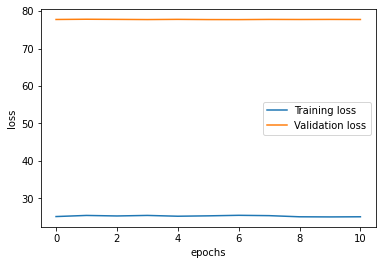

In [ ]:
# Visulizing the loss functions
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="Training loss")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

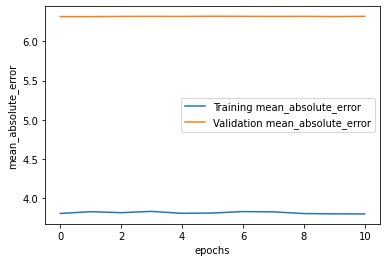

In [ ]:
# Visulizing the mean_absolute_error: functions
import matplotlib.pyplot as plt
plt.plot(history.history['mean_absolute_error'],label="T7")
plt.plot(history.history['val_mean_absolute_error'],label="Validation mean_absolute_error")
plt.xlabel('epochs')
plt.ylabel('mean_absolute_error')
plt.legend()
plt.show()

In [ ]:
valid_score = model1.evaluate(X_test, y_test, verbose=1)

149/149 [==============================] - 1s 5ms/step - loss: 77.7464 - mean_absolute_error: 6.3176


In [ ]:
model1.save("model1.h5")

In [ ]:
y=df['gender'].values
X_train, X_test, y_train, y_test1 = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Predicted Gender: Female ,Actual gender: Female
Predicted age: 32.0 ,Actual age: 26


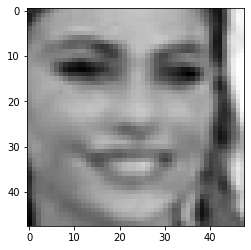

In [ ]:
i=1000
X =X_test[i]
X=np.reshape(X,(48,48))
plt.imshow(X,cmap='gray')
X = X.reshape(1, 48, 48, 1)
pred=np.round(model.predict(X))
pred1=np.round(model1.predict(X))
if(pred==0):
  pred='Male'
else:
  pred='Female'
if(y_test1[i]==0):
  pred2='Male'
else:
  pred2='Female'


print("Predicted Gender:",pred,",Actual gender:",pred2)
print("Predicted age:",pred1[0][0],",Actual age:",y_test[i])

Predicted Gender: Male ,Actual gender: Male
Predicted age: 32.0 ,Actual age: 42


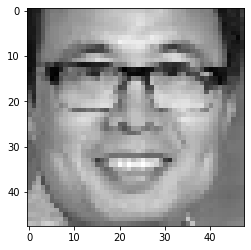

In [ ]:
i=1001
X =X_test[i]
X=np.reshape(X,(48,48))
plt.imshow(X,cmap='gray')
X = X.reshape(1, 48, 48, 1)
pred=np.round(model.predict(X))
pred1=np.round(model1.predict(X))
if(pred==0):
  pred='Male'
else:
  pred='Female'
if(y_test1[i]==0):
  pred2='Male'
else:
  pred2='Female'

print("Predicted Gender:",pred,",Actual gender:",pred2)
print("Predicted age:",pred1[0][0],",Actual age:",y_test[i])

Predicted Gender: Female ,Actual gender: Female
Predicted age: 27.0 ,Actual age: 20


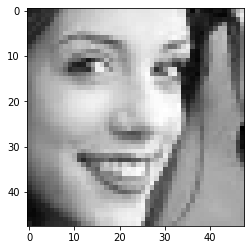

In [ ]:
i=1003
X =X_test[i]
X=np.reshape(X,(48,48))
plt.imshow(X,cmap='gray')
X = X.reshape(1, 48, 48, 1)
pred=np.round(model.predict(X))
pred1=np.round(model1.predict(X))
if(pred==0):
  pred='Male'
else:
  pred='Female'
if(y_test1[i]==0):
  pred2='Male'
else:
  pred2='Female'

print("Predicted Gender:",pred,",Actual gender:",pred2)
print("Predicted age:",pred1[0][0],",Actual age:",y_test[i])

Predicted Gender: Male ,Actual gender: Male
Predicted age: 51.0 ,Actual age: 50


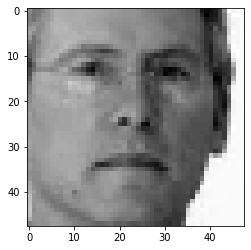

In [ ]:
i=1010
X =X_test[i]
X=np.reshape(X,(48,48))
plt.imshow(X,cmap='gray')
X = X.reshape(1, 48, 48, 1)
pred=np.round(model.predict(X))
pred1=np.round(model1.predict(X))
if(pred==0):
  pred='Male'
else:
  pred='Female'
if(y_test1[i]==0):
  pred2='Male'
else:
  pred2='Female'

print("Predicted Gender:",pred,",Actual gender:",pred2)
print("Predicted age:",pred1[0][0],",Actual age:",y_test[i])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual=y_test1
predicted=[]
for i  in range(len(X_test)):
  X=np.reshape(X_test[i],(48,48))
  X = X.reshape(1, 48, 48, 1)
  predicted.append(int(np.round(model.predict(X))))
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)

In [ ]:
def predict(img):
  plt.imshow(img,cmap='gray')
  img=np.array(tf.image.rgb_to_grayscale(
    img, name=None
))/255
  X = img.reshape(1, 48, 48, 1)
  pred=np.round(model.predict(X))
  pred1=np.round(model1.predict(X)) 
  if(pred==0):
    pred='Male'
  else:
    pred='Female'

  print("Predicted Gender:",pred,",Predicted age:",pred1[0][0])

In [ ]:
img = np.array(image.load_img("/content/gdrive/MyDrive/Others/Face Mask Dataset/Train/WithoutMask/10.png",target_size=(48,48)))
predict(img)

In [ ]:
img = np.array(image.load_img("/content/gdrive/MyDrive/Others/Face Mask Dataset/Train/WithoutMask/110.png",target_size=(48,48)))
predict(img)

In [ ]:
img = np.array(image.load_img("/content/gdrive/MyDrive/Others/Face Mask Dataset/Train/WithoutMask/118.png",target_size=(48,48)))
predict(img)

In [ ]:
img = np.array(image.load_img("/content/gdrive/MyDrive/Others/Face Mask Dataset/Train/WithoutMask/110.png",target_size=(48,48)))
predict(img)